In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\Asus\OneDrive\Desktop\Dataset\data_science_job.csv")
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [3]:
df.shape

(19158, 13)

In [4]:
 df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index     479
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
training_hours             766
target                       0
dtype: int64

In [6]:
(df.isnull().mean())*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [ ]:
# agr hum gender par cca apply kre ya phir comapany_size pe ya company_type pe toh
# toh bhot sara data vanish ho jayega

# toh hum code krenge ki joh column 5% se less ho aur 0 % se jyada ho vahi column ka data misiing nikla hai



# imp code

In [9]:
cols = [var for var in df.columns if (df[var].isnull().mean())*100 < 5 and (df[var].isnull().mean()*100)> 0]
cols


['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [13]:
df[cols].sample(5)

,city_development_index,enrolled_university,education_level,experience,training_hours
8589,0.910,no_enrollment,Graduate,18.0,9.0
4747,0.910,no_enrollment,High School,2.0,35.0
13954,0.949,no_enrollment,High School,20.0,149.0
13553,0.794,no_enrollment,Masters,16.0,44.0
12828,0.743,Full time course,Graduate,7.0,15.0


### mai yha par check kar rha hu ki phle joh tha usmese abhi ka joh nikala kitna bhachega


In [18]:
len(df[cols].dropna())

17182

In [17]:
len(df)

19158

In [19]:
len(df[cols].dropna())/len(df)

0.8968577095730244

In [20]:
new_df = df[cols].dropna()
df.shape, new_df.shape

((19158, 13), (17182, 5))

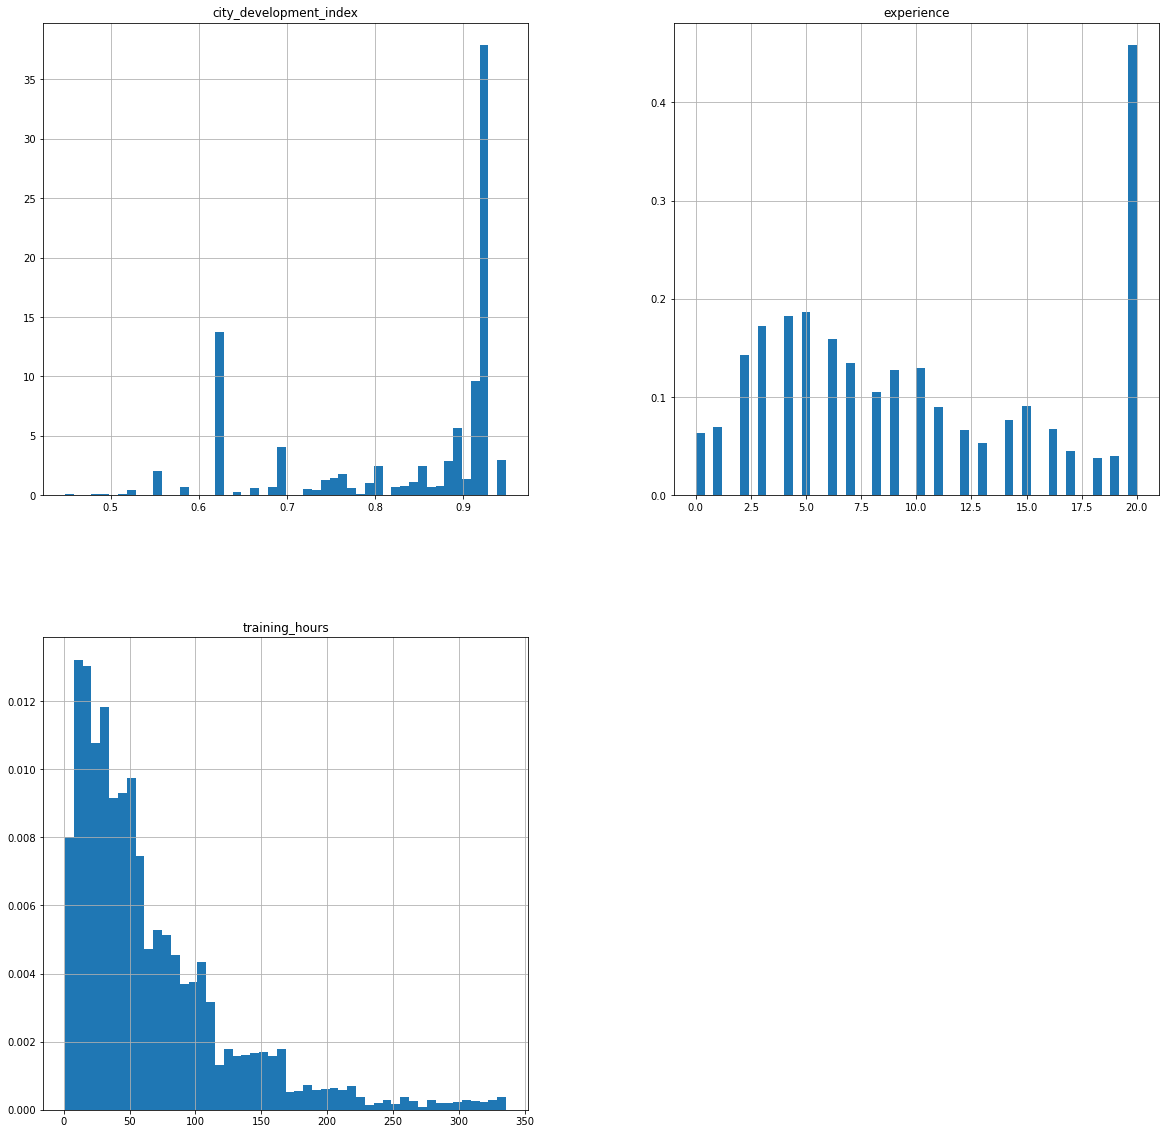

In [21]:
new_df.hist(bins=50 ,density=True,figsize = (20,20))
plt.show()

### Note:- agar aap numerical data ke upar CCA perform kar rhe ho, toh aap histogram plot kar ke dekho after aur before agar dono ka distribution comapirable hai toh CCA joh perform kiya voh thik hai.

# training hours

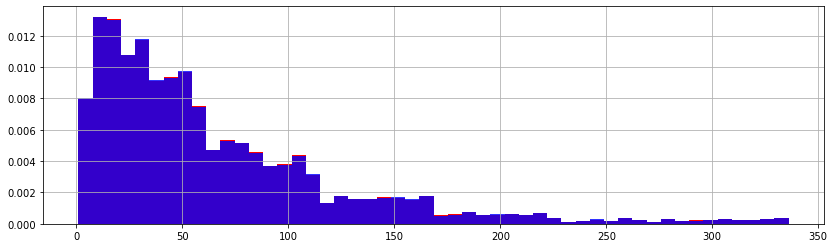

In [30]:
# sirf column wise hum perform kar rhe hai
fig = plt.figure(figsize=(14,4))
ax = fig.add_subplot(111)

# original data
df['training_hours'].hist(bins=50,density=True,color='red')



# new data
new_df['training_hours'].hist(bins=50,density= True,color = 'blue',alpha = 0.8)

plt.show()



### Observations:- koe jyda changes nahi dikh rh ehai msiing column hatatne ke bad aur hatne ke ple se koe problem nahi ahi

# pdf plot

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


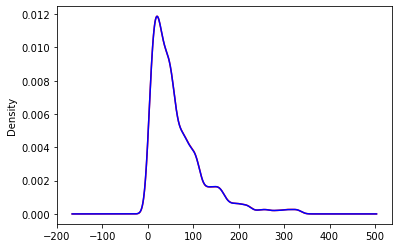

In [31]:
fig = plt.figure()

ax = fig.add_subplot(111)

df['training_hours'].plot.density(color = 'red')
new_df['training_hours'].plot.density(color = 'blue')
plt.show()

### observations:- so appko dikh rhaa hia ki overlap hai but piche dikh rha hai esse aapko pta chlta hai ki data was missing that was completly ata random

# city_development_index

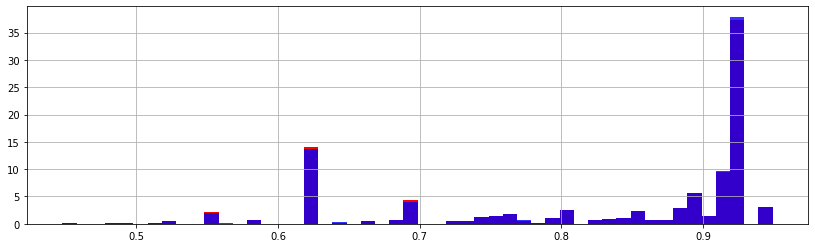

In [32]:

fig = plt.figure(figsize=(14,4))
ax = fig.add_subplot(111)

# original data
df['city_development_index'].hist(bins=50,density=True,color='red')



# new data
new_df['city_development_index'].hist(bins=50,density= True,color = 'blue',alpha = 0.8)

plt.show()

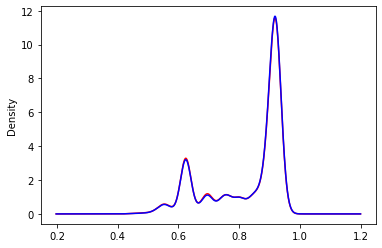

In [33]:
fig = plt.figure()

ax = fig.add_subplot(111)

df['city_development_index'].plot.density(color = 'red')
new_df['city_development_index'].plot.density(color = 'blue')
plt.show()

# experience

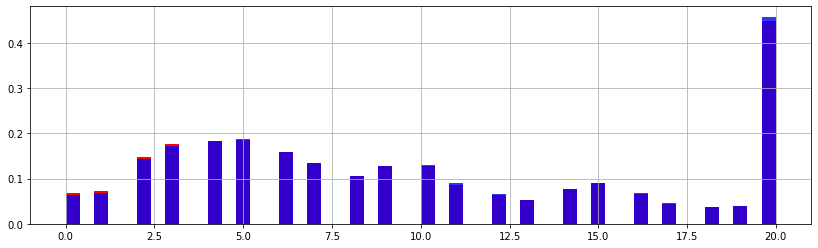

In [34]:
fig = plt.figure(figsize=(14,4))
ax = fig.add_subplot(111)

# original data
df['experience'].hist(bins=50,density=True,color='red')



# new data
new_df['experience'].hist(bins=50,density= True,color = 'blue',alpha = 0.8)

plt.show()

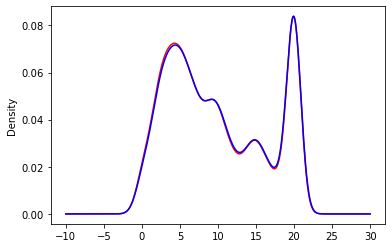

In [35]:
fig = plt.figure()

ax = fig.add_subplot(111)

df['experience'].plot.density(color = 'red')
new_df['experience'].plot.density(color = 'blue')
plt.show()

# lets hadnled the categorical data

In [36]:
new_df.head(4)

,city_development_index,enrolled_university,education_level,experience,training_hours
0,0.920,no_enrollment,Graduate,20.0,36.0
1,0.776,no_enrollment,Graduate,15.0,47.0
2,0.624,Full time course,Graduate,5.0,83.0
4,0.767,no_enrollment,Masters,20.0,8.0


In [37]:
new_df['enrolled_university'].value_counts()

no_enrollment       12632
Full time course     3449
Part time course     1101
Name: enrolled_university, dtype: int64

In [40]:
new_df['education_level'].value_counts()

Graduate          10650
Masters            4022
High School        1845
Phd                 380
Primary School      285
Name: education_level, dtype: int64

# graduate ka jitna ratio hai utna hi remaining rhna chahiye after removing the data esse proeve ho jayega aapka joh data hai voh copletely missing at random

In [48]:
temps = pd.concat([
        # percentage of observation in per category,original data
        df['enrolled_university'].value_counts()/len(df),

        # percentage of observation in per category,new_data
        new_df['enrolled_university'].value_counts()/len(new_df)
        ],axis = 1)
# lets give the name of columns

# temps.columns['original','cca']
# temps

In [55]:
temps.columns=['original','cca']
temps



,original,cca
no_enrollment,0.721213,0.735188
Full time course,0.196106,0.200733
Part time course,0.062533,0.064079


### observations :- no more differnece between orginal and new one so  it means that data are missing in MCRA manner

In [56]:
temps_edu = pd.concat([
        # percentage of observation in per category,original data
        df['education_level'].value_counts()/len(df),

        # percentage of observation in per category,new_data
        new_df['education_level'].value_counts()/len(new_df)
        ],axis = 1)


temps_edu.columns = ['original','cca']
temps_edu

,original,cca
Graduate,0.605387,0.619835
Masters,0.227633,0.234082
High School,0.105282,0.107380
Phd,0.021610,0.022116
Primary School,0.016077,0.016587


# moral:- so aap data ke kam missing hai toh aap CCA perform kar skte ho but uske phle check kar lena missing data at randomly perform crteria fulfil kra rha hai but problem hai ki data production ke vakt koe missing data n aa jaye kyoki hmmne missing data ke sath perform nhi kiya .product me agar aa gya ki missing dtaat hai tab voh handle nhi kr payega kyoki use nhi pta ki kis tarik se handle karna hai. so ek ek drwaback hai espiye hum CCA jydatr perform nhi krte hai